# REGRESIÓN LINEAL POLINOMIAL

## 0. Importar las librerias

In [1]:
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 
import pandas as pd
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns
import sklearn
from numpy.random import default_rng

%matplotlib inline

## 1. Datos

### Descripción

Datos sintéticos con un comportamiento cuadrático y un ruido aleatorio de media 0 y desviación estándar 10.

In [2]:
#Vamos a crear algunas observaciones del atributo de entrada. 
#Cada fila del vector columna es una observación. 
x = np.arange(0,10,0.1).reshape((-1,1))

#Variable de salida sin ruido (en realidad esto nunca se conoce).
t      = 5 + 3*x**2                #t=w0_ideal+w1_ideal*x^2

#Número de observaciones disponibles.
m = x.shape[0]  

#Ahora vamos a contaminar la variable t con ruido tomando de una distribución normal
#con media cero y una desviación estándar dada.
random_seed = 123 
media       = 0   
std_dev     = 10
rng         = default_rng(seed = random_seed)
noise       = (media + (std_dev)*( rng.standard_normal(m) )).reshape((-1,1))

#Variable de salida contaminada (esta es la que uno observaría)
y       = t +noise

## 2. Análisis Exploratorio

In [3]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


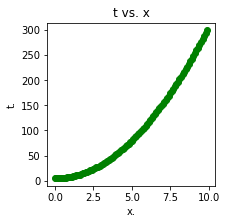

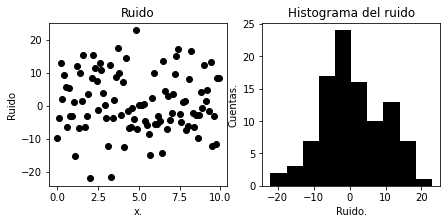

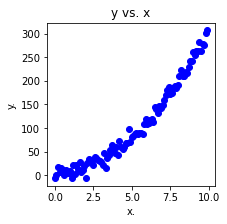

In [5]:
#Gráficas de los datos.

plt.figure(figsize=(3,3))
plt.scatter(x,t,color='green')
plt.xlabel('x.')
plt.ylabel('t.')
plt.title('t vs. x')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].scatter(x,noise,color='black')
ax[0].set_xlabel('x.')
ax[0].set_ylabel('Ruido')
ax[0].set_title('Ruido')

ax[1].hist(noise,color='black')
ax[1].set_xlabel('Ruido.')
ax[1].set_ylabel('Cuentas.')
ax[1].set_title('Histograma del ruido')
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(x,y,color='blue')
plt.xlabel('x.')
plt.ylabel('y.')
plt.title('y vs. x')
plt.show()

## 3. Modelo

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

In [8]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [9]:
print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1]=', lin_reg_model.coef_)

intercept [w0]= [-50.0329532]
slope [w1]= [[30.70844809]]


## 4. Evaluación

NameError: name 'y_pred_train' is not defined

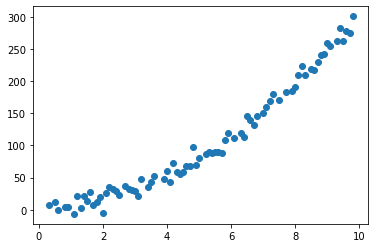

In [10]:
# EVALUAR USANDO EL CONJUNTO DE ENTRENAMIENTO

from sklearn import metrics

_pred_train = lin_reg_model.predict(X_train)

plt.scatter(X_train, y_train, label='Real')
plt.plot(X_train,y_pred_train,'r', label='Predicted')
plt.title('Output VS Input [TRAIN]')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train

plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

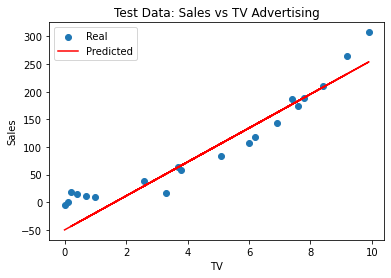

coefficient R^2 for test data: 0.8768


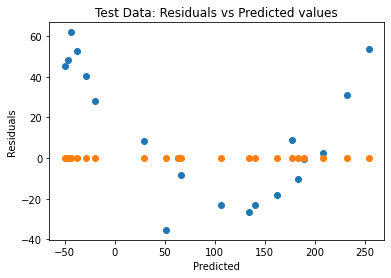

MSE= 1046.9601
RMSE: 32.3568


In [11]:
# EVALUAR USANDO EL CONJUNTO DE PRUEBA

y_pred_test = lin_reg_model.predict(X_test)

plt.scatter(X_test, y_test, label='Real')
plt.plot(X_test, y_pred_test, 'r', label='Predicted')
plt.title('Test Data: Sales vs TV Advertising')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

e_test = y_test - y_pred_test

plt.scatter(y_pred_test,e_test)
a = np.zeros(len(e_test))
a = a.reshape(-1,1)
plt.scatter(y_pred_test,a)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

## 5. Repetir los pasos 3 y 4 probando otros modelos con el objetivo de encontrar uno que pueda tener un mejor desempeño.

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

In [13]:
x_mod = x**2

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_mod, y, test_size = 0.2, random_state = 45)

In [15]:
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 
import pandas as pd
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns
import sklearn

%matplotlib inline

In [16]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [17]:
print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1]=', lin_reg_model.coef_)

intercept [w0]= [5.74108748]
slope [w1]= [[2.99309221]]


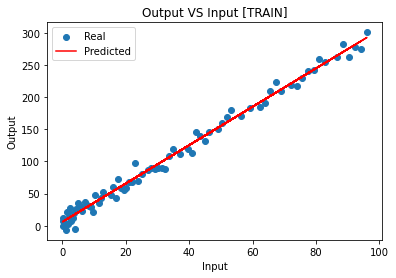

coefficient R^2 for training data: 0.9901


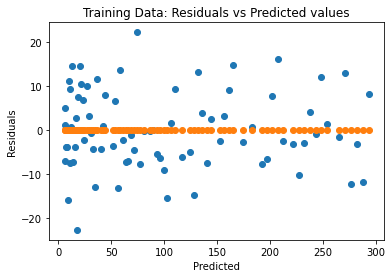

MSE= 76.2830
RMSE: 8.7340


In [18]:
# EVALUAR USANDO EL CONJUNTO DE ENTRENAMIENTO

from sklearn import metrics

y_pred_train = lin_reg_model.predict(X_train)

plt.scatter(X_train, y_train, label='Real')
plt.plot(X_train,y_pred_train,'r', label='Predicted')
plt.title('Output VS Input [TRAIN]')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train

plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

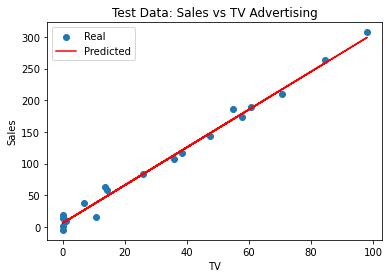

coefficient R^2 for test data: 0.9887


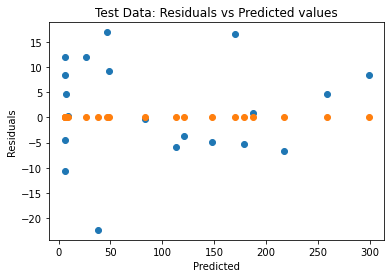

MSE= 95.6581
RMSE: 9.7805


In [19]:
# EVALUAR USANDO EL CONJUNTO DE PRUEBA

y_pred_test = lin_reg_model.predict(X_test)

plt.scatter(X_test, y_test, label='Real')
plt.plot(X_test, y_pred_test, 'r', label='Predicted')
plt.title('Test Data: Sales vs TV Advertising')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

e_test = y_test - y_pred_test

plt.scatter(y_pred_test,e_test)
a = np.zeros(len(e_test))
a = a.reshape(-1,1)
plt.scatter(y_pred_test,a)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

In [20]:
w0 = lin_reg_model.intercept_
w1 = lin_reg_model.coef_

y_pred = w0 + w1*x**2

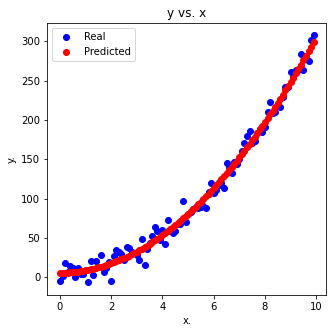

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(x,y,color='blue',label='Real')
plt.scatter(x,y_pred,color='red',label='Predicted')
plt.xlabel('x.')
plt.ylabel('y.')
plt.title('y vs. x')
plt.legend()
plt.show()